In [2]:
import os
os.environ[ "TF_CPP_MIN_LOG_LEVEL"] = "3"
import json
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity( tf.compat.v1.logging.ERROR)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
with open( "./sarcasm.json", "r") as f:
	datastore = json.load( f)

sentences = []
labels = []

for item in datastore:
	sentences.append( item[ "headline"])
	labels.append( item[ "is_sarcastic"])

In [4]:
training_size = 20000

vocab_size = 10000

max_length = 24

embedding_dim = 12

In [5]:
training_sentences = sentences[ 0:training_size]
testing_sentences = sentences[ training_size:]

training_labels = labels[ 0:training_size]
testing_labels = labels[ training_size:]

In [6]:
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer( num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts( training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences( training_sentences)
training_padded = pad_sequences(
	training_sequences,
	maxlen=max_length,
	padding=padding_type,
	truncating=trunc_type
)

testing_sequences = tokenizer.texts_to_sequences( testing_sentences)
testing_padded = pad_sequences(
	testing_sequences,
	maxlen=max_length,
	padding=padding_type,
	truncating=trunc_type
)

training_labels = np.array( training_labels)
testing_labels = np.array( testing_labels)

In [7]:
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

sample_array = np.array( [ [ [ 10, 2], [ 1, 3], [ 1, 1]]])

print( f"shape of sample_array = { sample_array.shape}")
print( f"sample_array:\n{ sample_array}")

output = gap1d_layer( sample_array)

print( f"output shape of gap1d_layer: { output.shape}")
print( f"output array of gap1d_layer: { output.numpy()}")

shape of sample_array = (1, 3, 2)
sample_array:
[[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [8]:
model = tf.keras.Sequential( [
	tf.keras.layers.Embedding( vocab_size, embedding_dim, input_length=max_length),
	tf.keras.layers.GlobalAveragePooling1D(),
	tf.keras.layers.Dense( 24, activation="relu"),
	tf.keras.layers.Dense( 1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 12)            120000    
                                                                 
 global_average_pooling1d_1  (None, 12)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 120337 (470.07 KB)
Trainable params: 120337 (470.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(
	loss="binary_crossentropy",
	optimizer="adam",
	metrics=[ "accuracy"]
)

In [10]:
num_epochs = 5

history = model.fit(
	training_padded,
	training_labels,
	epochs=num_epochs,
	validation_data=( testing_padded, testing_labels)
)

Epoch 1/5
625/625 [==============================] - 4s 4ms/step - loss: 0.5507 - accuracy: 0.7165 - val_loss: 0.3877 - val_accuracy: 0.8392
Epoch 2/5
625/625 [==============================] - 2s 4ms/step - loss: 0.3024 - accuracy: 0.8766 - val_loss: 0.3424 - val_accuracy: 0.8566
Epoch 3/5
625/625 [==============================] - 2s 4ms/step - loss: 0.2260 - accuracy: 0.9108 - val_loss: 0.3553 - val_accuracy: 0.8524
Epoch 4/5
625/625 [==============================] - 2s 4ms/step - loss: 0.1821 - accuracy: 0.9307 - val_loss: 0.3777 - val_accuracy: 0.8439
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1511 - accuracy: 0.9453 - val_loss: 0.3931 - val_accuracy: 0.8526


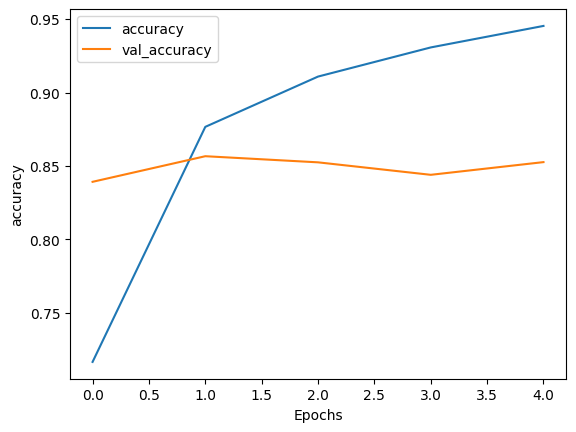

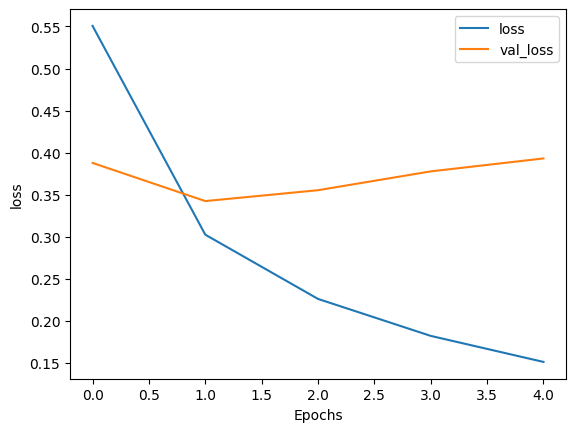

In [11]:
def plot_graphs( history, string):
	plt.plot( history.history[ string], label=string)
	plt.plot( history.history[ f"val_{ string}"], label=f"val_{ string}")
	plt.xlabel( "Epochs")
	plt.ylabel( string)
	plt.legend()
	plt.show()

plot_graphs( history, "accuracy")
plot_graphs( history, "loss")